# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | nemuro
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | alofi
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | bonthe
Processing Record 9 of Set 1 | badger
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | manokwari
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | gobabis
Processing Record 15 of Set 1 | villa gesell
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | kayangel
Processing Record 18 of Set 1 | sanghar
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | xinqing
Processing Record 22 of Set 1 | caburan
Processing Record 23 of Set 1 | atafu village
Processing

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.6391,-120.4579,299.18,85,75,2.24,US,1691339729
1,bredasdorp,-34.5322,20.0403,285.06,91,18,1.54,ZA,1691339729
2,nemuro,43.3236,145.5750,287.32,97,100,5.69,JP,1691339729
3,waitangi,-43.9535,-176.5597,279.72,64,75,5.23,NZ,1691339248
4,tura,25.5198,90.2201,297.21,98,100,2.54,IN,1691339730


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.6391,-120.4579,299.18,85,75,2.24,US,1691339729
1,bredasdorp,-34.5322,20.0403,285.06,91,18,1.54,ZA,1691339729
2,nemuro,43.3236,145.5750,287.32,97,100,5.69,JP,1691339729
3,waitangi,-43.9535,-176.5597,279.72,64,75,5.23,NZ,1691339248
4,tura,25.5198,90.2201,297.21,98,100,2.54,IN,1691339730


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

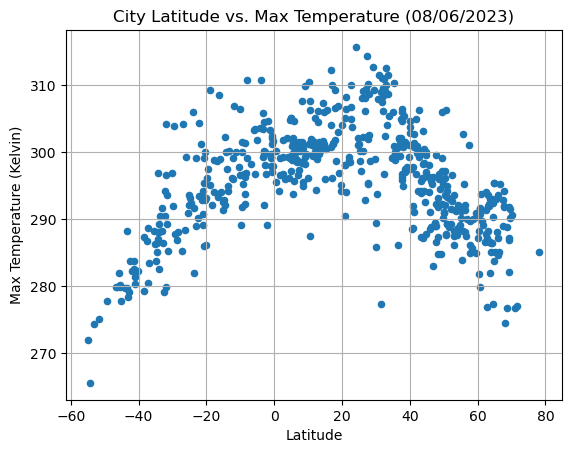

In [13]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat", "Max Temp")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (08/06/2023)")
plt.ylabel("Max Temperature (Kelvin)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

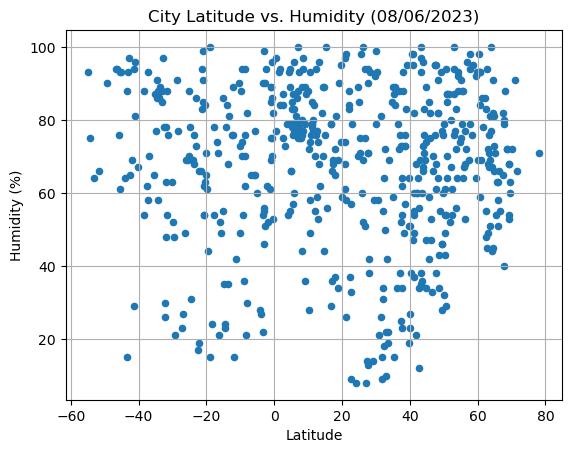

In [14]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter("Lat", "Humidity")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (08/06/2023)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

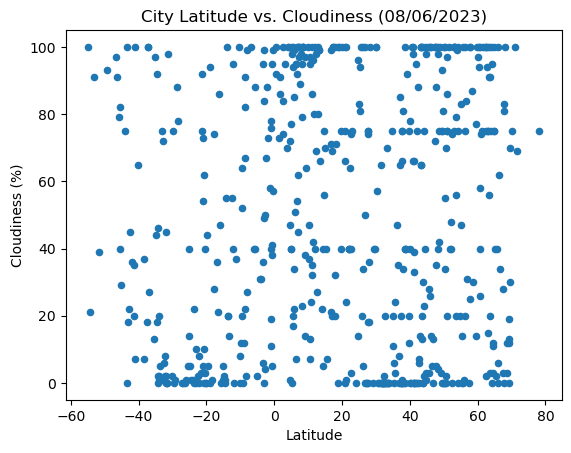

In [15]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter("Lat", "Cloudiness")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (08/06/2023)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

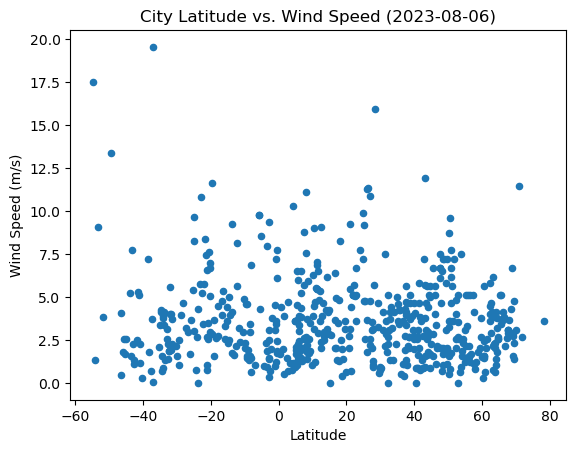

In [17]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter("Lat", "Wind Speed")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-08-06)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def linear_regression_plot(df, x_values, y_values):
    """
    Perform linear regression and create a scatter plot with the regression line.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the data
        x_values (str): x-axis values
        y_values (str): y-axis values
    """
    # Linear Regression Math
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df[x_values], df[y_values])

    # Regression line equation
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    #Create scatter plot
    df.plt.scatter(x_values, y_values)
    df.plt.plot(df[x_values], slope*df[x_values] + intercept, color='red', label='Regression Line')

    #Plot the data and the regression line
    # (x-min, x-max) = plt.xlim()
    # (y-min, y-max) = plt.ylim()
    # plt.axline((0, intercept), slope=slope, color='red', label='Regression Line')

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.6391,-120.4579,299.18,85,75,2.24,US,1691339729
2,nemuro,43.3236,145.5750,287.32,97,100,5.69,JP,1691339729
4,tura,25.5198,90.2201,297.21,98,100,2.54,IN,1691339730
7,bonthe,7.5264,-12.5050,300.13,75,89,5.72,SL,1691339730
8,badger,64.8000,-147.5333,295.45,73,100,2.57,US,1691339673


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bredasdorp,-34.5322,20.0403,285.06,91,18,1.54,ZA,1691339729
3,waitangi,-43.9535,-176.5597,279.72,64,75,5.23,NZ,1691339248
5,alofi,-19.0595,-169.9187,295.09,100,94,1.54,NU,1691339730
6,adamstown,-25.0660,-130.1015,293.64,70,14,9.68,PN,1691339730
10,ancud,-41.8697,-73.8203,282.32,69,36,2.48,CL,1691339730


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


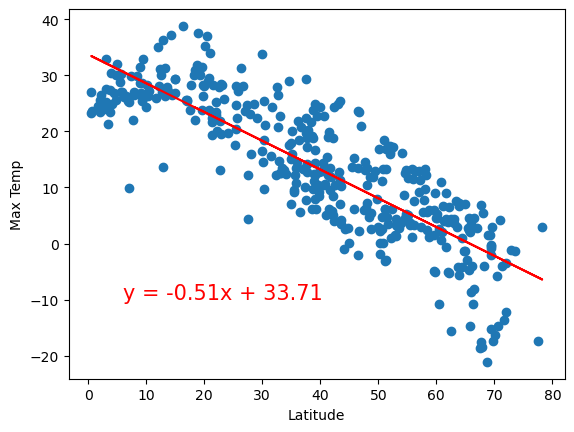

In [15]:
# Linear regression on Northern Hemisphere


The r-value is: 0.4121057168607245


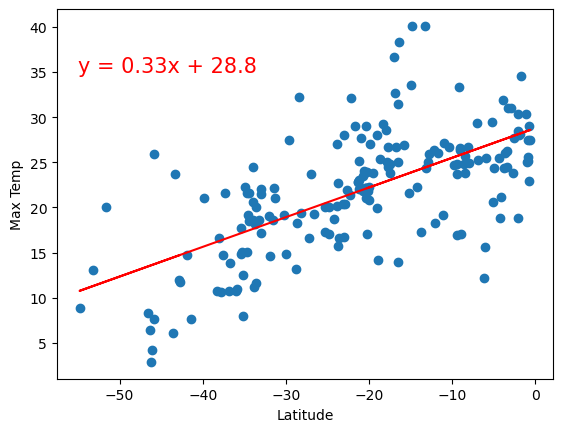

In [16]:
# Linear regression on Southern Hemisphere


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


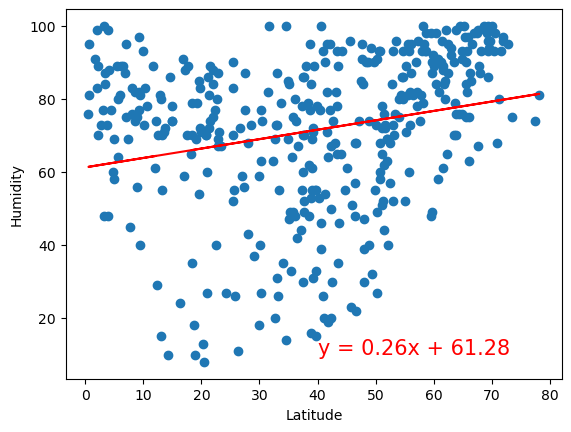

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


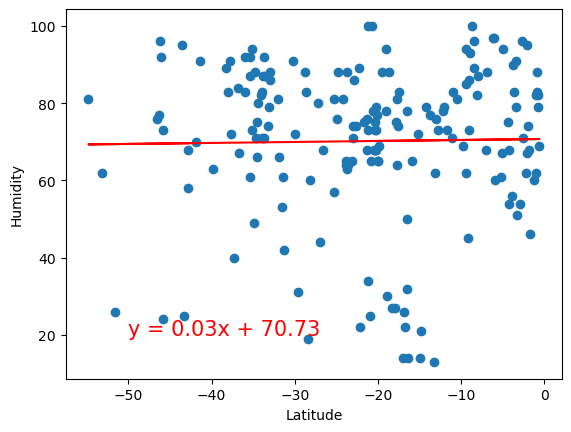

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


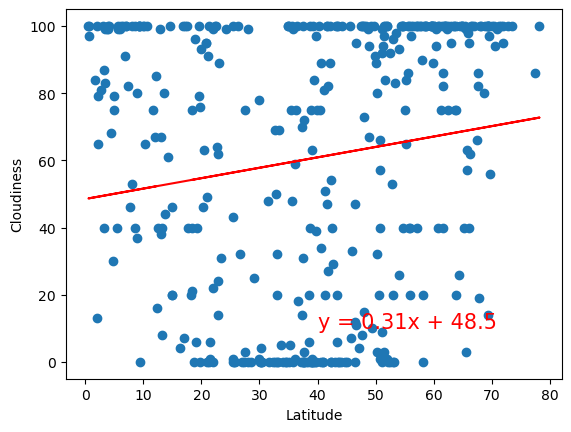

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


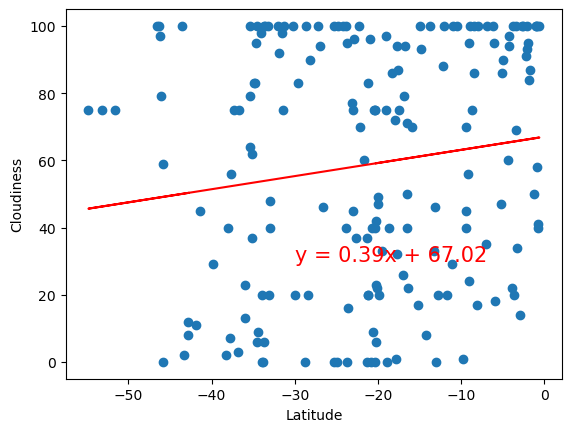

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


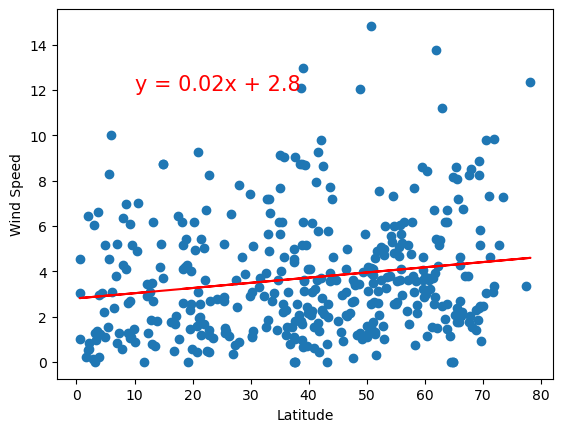

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


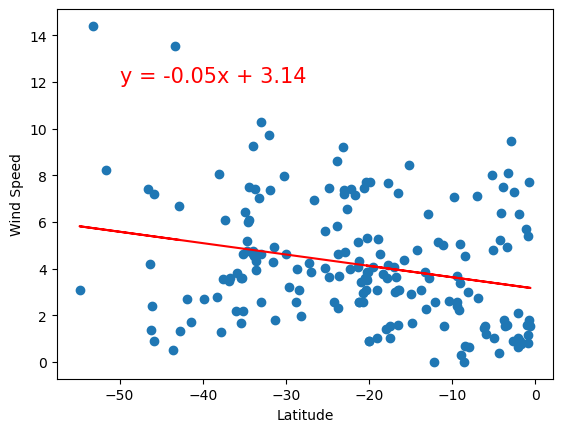

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE